In [113]:
import numpy as np
import pandas as pd
from scipy import stats

songs=pd.read_csv('data/tracks.csv')
songs=songs.head(30000)

In [114]:
songs_for_neural = songs.copy()
songs_for_neural.set_index('id',inplace=True)

In [115]:
def drop_columns(dataframe,to_be_deleted):
    dataframe.drop(to_be_deleted, axis=1, inplace=True)
to_be_deleted = ['id_artists', 'artists','name','release_date'] 

In [116]:
songs_for_neural['year'] = pd.DatetimeIndex(songs_for_neural['release_date']).year
songs_for_neural['month'] = pd.DatetimeIndex(songs_for_neural['release_date']).month

In [117]:
import sklearn
from sklearn import preprocessing

def scaler(dataframe,to_be_scaled):
    scaler = sklearn.preprocessing.StandardScaler(copy = True)
    dataframe[to_be_scaled] = scaler.fit_transform(dataframe[to_be_scaled].to_numpy())
# to_be_scaled = ['popularity','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']
to_be_scaled = ['loudness','duration_ms','tempo']

In [118]:
drop_columns(songs_for_neural,to_be_deleted)#delete columns
songs_for_neural["key"] = songs_for_neural["key"].astype("category")
songs_for_neural = pd.get_dummies(songs_for_neural, columns=["key"])

In [119]:
songs_for_neural[(np.abs(stats.zscore(songs_for_neural)) < 5).all(axis=1)]

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
id,,,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,6,126903,0,0.645,0.4450,-13.338,1,0.4510,0.674,0.74400,...,0,0,0,0,0,0,0,0,0,0
021ht4sdgPcrDgSk7JTbKY,0,98200,0,0.695,0.2630,-22.136,1,0.9570,0.797,0.00000,...,0,0,0,0,0,0,0,0,0,0
07A5yehtSnoedViJAZkNnc,0,181640,0,0.434,0.1770,-21.180,1,0.0512,0.994,0.02180,...,0,0,0,0,0,0,0,0,0,0
08FmqUhxtyLTn6pAh6bk45,0,176907,0,0.321,0.0946,-27.961,1,0.0504,0.995,0.91800,...,0,0,0,0,0,1,0,0,0,0
08y9GfoqCWfOGsKdwojr5e,0,163080,0,0.402,0.1580,-16.900,0,0.0390,0.989,0.13000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2bsP9KCIRT4krLc9VfWYgq,21,387440,0,0.462,0.5130,-13.274,0,0.0414,0.518,0.00454,...,0,0,0,0,0,1,0,0,0,0
3Mv5fvX7SR4SacDFDYv3O2,21,78293,0,0.396,0.2670,-17.192,1,0.0356,0.993,0.89700,...,0,0,0,0,0,1,0,0,0,0
3XfPnHPEP1XSG0eElfP9Uh,21,42960,0,0.435,0.1660,-26.902,1,0.0618,0.996,0.92300,...,0,0,0,0,0,1,0,0,0,0


In [120]:
# scaler(songs_for_neural,to_be_scaled)

In [121]:
songs_for_neural.dropna(inplace=True)

In [122]:
x = songs_for_neural['valence']
del songs_for_neural["valence"]
songs_for_neural['valence'] = x 

# AND SO IT BEGINS

In [123]:
songs_for_neural

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,valence
id,,,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,6,126903,0,0.645,0.4450,-13.338,1,0.4510,0.674,0.74400,...,0,0,0,0,0,0,0,0,0,0.127
021ht4sdgPcrDgSk7JTbKY,0,98200,0,0.695,0.2630,-22.136,1,0.9570,0.797,0.00000,...,0,0,0,0,0,0,0,0,0,0.655
07A5yehtSnoedViJAZkNnc,0,181640,0,0.434,0.1770,-21.180,1,0.0512,0.994,0.02180,...,0,0,0,0,0,0,0,0,0,0.457
08FmqUhxtyLTn6pAh6bk45,0,176907,0,0.321,0.0946,-27.961,1,0.0504,0.995,0.91800,...,0,0,0,0,1,0,0,0,0,0.397
08y9GfoqCWfOGsKdwojr5e,0,163080,0,0.402,0.1580,-16.900,0,0.0390,0.989,0.13000,...,1,0,0,0,0,0,0,0,0,0.196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2bsP9KCIRT4krLc9VfWYgq,21,387440,0,0.462,0.5130,-13.274,0,0.0414,0.518,0.00454,...,0,0,0,0,1,0,0,0,0,0.745
3Mv5fvX7SR4SacDFDYv3O2,21,78293,0,0.396,0.2670,-17.192,1,0.0356,0.993,0.89700,...,0,0,0,0,1,0,0,0,0,0.727
3XfPnHPEP1XSG0eElfP9Uh,21,42960,0,0.435,0.1660,-26.902,1,0.0618,0.996,0.92300,...,0,0,0,0,1,0,0,0,0,0.972


In [124]:
songs_for_neural_array = songs_for_neural.values

In [125]:
X = songs_for_neural_array[:,0:27]

In [126]:
Y = songs_for_neural_array[:,27]

In [127]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(21000, 27) (4500, 27) (4500, 27) (21000,) (4500,) (4500,)


In [129]:
from keras.models import Sequential
from keras.layers import Dense

In [130]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(27,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [131]:
model.compile(optimizer='sgd',
              loss='mae',
              metrics=['MeanSquaredError'])

In [134]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
657/657 [==============================] - 1s 1ms/step - loss: 0.2204 - mean_squared_error: 0.0686 - val_loss: 0.2156 - val_mean_squared_error: 0.0648
Epoch 2/100
657/657 [==============================] - 1s 875us/step - loss: 0.2143 - mean_squared_error: 0.0643 - val_loss: 0.2099 - val_mean_squared_error: 0.0613
Epoch 3/100
657/657 [==============================] - 1s 1ms/step - loss: 0.2077 - mean_squared_error: 0.0604 - val_loss: 0.2029 - val_mean_squared_error: 0.0569
Epoch 4/100
657/657 [==============================] - 1s 1ms/step - loss: 0.1997 - mean_squared_error: 0.0560 - val_loss: 0.1941 - val_mean_squared_error: 0.0521
Epoch 5/100
657/657 [==============================] - 1s 1000us/step - loss: 0.1897 - mean_squared_error: 0.0508 - val_loss: 0.1825 - val_mean_squared_error: 0.0466
Epoch 6/100
657/657 [==============================] - 1s 1ms/step - loss: 0.1773 - mean_squared_error: 0.0450 - val_loss: 0.1689 - val_mean_squared_error: 0.0408
Epoch 7/100
657/6

In [138]:
model.evaluate(X_test, Y_test)[0]

141/141 [==============================] - 0s 829us/step - loss: 0.1212 - mean_squared_error: 0.0255


0.12117945402860641

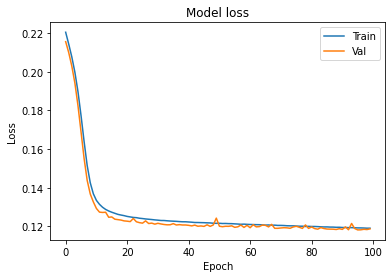

In [136]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()